In [1]:
import pandas as pd
%matplotlib inline
import glob, os
from kinetics.ala_kinetics import *
from kinetics.waiting_time import *
from kinetics.sorted_lifetimes import *
import pyprind

# Load data

In [2]:
pwd

/home/tb/lustelzl/anaconda2/lib/python2.7/site-packages/IPython/core/formatters.py:90: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/home/tb/lustelzl/anaconda2/lib/python2.7/site-packages/IPython/core/formatters.py:667: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


u'/home/tb/lustelzl/Projects/kinetics/alanine-dipeptide/compare_remd_md/dt-comparison/comparison'

In [3]:
ls ../dt*/remd_dt*/*rates_sym_ln*_6jan16.pickle

../dt1000/remd_dt1000/ala_remd_st1_dt1000ps__6jan16_rates_sym_ln__6jan16.pickle
../dt100/remd_dt100/ala_remd_st1_dt100ps__6jan16_rates_sym_ln__6jan16.pickle
../dt10/remd_dt10/ala_remd_st1_dt10ps__6jan16_rates_sym_ln__6jan16.pickle
../dt1/remd_dt1/ala_remd_st1_dt1ps__6jan16_rates_sym_ln__6jan16.pickle
../dt200/remd_dt200/ala_remd_st1_dt200ps__6jan16_rates_sym_ln__6jan16.pickle
../dt20/remd_dt20/ala_remd_st1_dt20ps__6jan16_rates_sym_ln__6jan16.pickle
../dt2500/remd_dt2500/ala_remd_st1_dt2500ps__6jan16_rates_sym_ln__6jan16.pickle
../dt25/remd_dt25/ala_remd_st1_dt25ps__6jan16_rates_sym_ln__6jan16.pickle
../dt2/remd_dt2/ala_remd_st1_dt2ps__6jan16_rates_sym_ln__6jan16.pickle
../dt5000/remd_dt5000/ala_remd_st1_dt5000ps__6jan16_rates_sym_ln__6jan16.pickle
../dt500/remd_dt500/ala_remd_st1_dt500ps__6jan16_rates_sym_ln__6jan16.pickle
../dt50/remd_dt50/ala_remd_st1_dt50ps__6jan16_rates_sym_ln__6jan16.pickle
../dt5/remd_dt5/ala_remd_st1_dt5ps__6jan16_rates_sym_ln__6jan16.pickle


In [4]:
ls ../dt*/c_md_dt*/rates_md_st1-3_sym_ln*_6jan16.pickle

../dt1000/c_md_dt1000/rates_md_st1-3_sym_ln__6jan16.pickle
../dt100/c_md_dt100/rates_md_st1-3_sym_ln__6jan16.pickle
../dt10/c_md_dt10/rates_md_st1-3_sym_ln__6jan16.pickle
../dt1/c_md_dt1/rates_md_st1-3_sym_ln__6jan16.pickle
../dt200/c_md_dt200/rates_md_st1-3_sym_ln__6jan16.pickle
../dt20/c_md_dt20/rates_md_st1-3_sym_ln__6jan16.pickle
../dt2500/c_md_dt2500/rates_md_st1-3_sym_ln__6jan16.pickle
../dt25/c_md_dt25/rates_md_st1-3_sym_ln__6jan16.pickle
../dt2/c_md_dt2/rates_md_st1-3_sym_ln__6jan16.pickle
../dt5000/c_md_dt5000/rates_md_st1-3_sym_ln__6jan16.pickle
../dt500/c_md_dt500/rates_md_st1-3_sym_ln__6jan16.pickle
../dt50/c_md_dt50/rates_md_st1-3_sym_ln__6jan16.pickle
../dt5/c_md_dt5/rates_md_st1-3_sym_ln__6jan16.pickle


In [5]:
remd_r_dt_d = {}
for dt_fn_name in glob.glob("../dt*/remd_dt*/*rates_sym_ln*_6jan16.pickle"):
    dt = dt_fn_name.split("/")[1][2:]
    print dt
    remd_r_dt_d[dt] = pd.read_pickle(dt_fn_name)

2500
500
200
20
2
50
5
25
100
10
5000
1000
1


In [6]:
md_r_dt_d = {}
for dt_fn_name in glob.glob("../dt*/c_md_dt*/rates_md_st1-3_sym_ln_*6jan16.pickle"):

    dt = dt_fn_name.split("/")[1][2:]
    md_r_dt_d[dt] = pd.read_pickle(dt_fn_name)
#ls ../dt*/c_md_dt*/rates_md_st1-3_sym_ln.pickle

[]

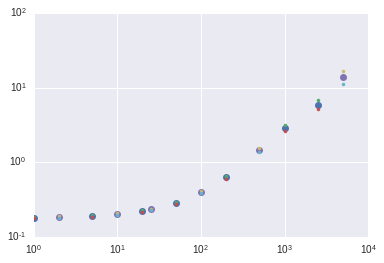

In [7]:
for dt, dt_r in md_r_dt_d.items():
    md_r = dt_r[(dt_r.temperature==0) & (dt_r.type==(0,0,0,1))]
    plt.plot(dt, 1.0 / md_r.rate, "o")
    plt.plot(dt, 1.0 /  md_r.std_m, ".")
    plt.plot(dt, 1.0/ md_r.std_p, ".")
    
plt.semilogx()
plt.semilogy()

In [8]:
%%capture c

for dt, dt_r in md_r_dt_d.items():
    print dt
    md_r = dt_r[(dt_r.temperature==0) & (dt_r.type==(0,0,0,1))]
    #ax[0].plot(dt, 1.0 / md_r.rate.values, "o", c='red')
    print md_r.rate.shape, md_r.err_m.shape
    plt.errorbar(int(dt),  md_r.rate, yerr=[ md_r.std_m.values, md_r.std_p.values] )

In [9]:
cl = sns.color_palette()

In [10]:

#fig.savefig("ala_md_remd_r_dt_1.png", dpi=800)
#fig.savefig("ala_md_remd_r_dt_1.pdf")

# $\Delta t$ rate comparison

200
5000
20
25
50
10
1
2
5
100
1000
500
2500


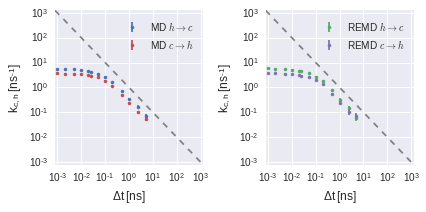

In [11]:
fig, ax = plt.subplots(1,2, figsize=(6,3))
sns.set_style('ticks')

# add errrorbars!

for dt, dt_r in md_r_dt_d.items():
    print dt
    md_r = dt_r[(dt_r.temperature==0) & (dt_r.type==(0,0,0,1))]
    #ax[0].plot(dt, 1.0 / md_r.rate.values, "o", c='red')
    md_lg = ax[0].errorbar(int(dt) / 1000.0,  md_r.rate.values, yerr=[md_r.err_m.values ,
                                                              md_r.err_p.values ],
                   c=cl[0], fmt=".", label=r"$h \rightarrow c$")
    
    md_r = dt_r[(dt_r.temperature==0) & (dt_r.type==(0,1,0,0))]
    #ax[0].plot(dt, 1.0 / md_r.rate.values, "o", c='blue')
    md_lg2 = ax[0].errorbar(int(dt)/ 1000.0,  md_r.rate.values, yerr=[md_r.err_m.values ,
                                                                  md_r.err_p.values ],
                   c=cl[2], fmt=".", label=r"$c \rightarrow h$" )
      
ax[0].legend([md_lg, md_lg2], [r"MD $h \rightarrow c$",
                               r"MD $c \rightarrow h$"],
            loc=1)
        

for dt, dt_r in remd_r_dt_d.items():
    md_r = dt_r[(dt_r.temperature==0) & (dt_r.type==(0,0,0,1))]

    lg_remd = ax[1].errorbar(int(dt) /1000.0,  md_r.rate.values, yerr=[ md_r.err_m.values ,
                                                                   md_r.err_p.values ],
                  c=cl[1], fmt=".",  label=r"$h \rightarrow c$")
    md_r = dt_r[(dt_r.temperature==0) & (dt_r.type==(0,1,0,0))]
    
    lg_remd2 = ax[1].errorbar(int(dt)/ 1000.0,  md_r.rate.values, yerr=[md_r.err_m.values ,
                                                          md_r.err_p.values ],
                  c=cl[3], fmt=".", label=r"$c \rightarrow h$" )

ax[1].legend([lg_remd, lg_remd2], [r"REMD $h \rightarrow c$",
                               r"REMD $c \rightarrow h$"],
            loc=1)

#ax[0].semilogx()
#plt.semilogx()

for a in ax:
    a.loglog()
    a.set_xlim(10**-3.1, 10**3.1)
    a.set_ylim(10**-3.1, 10**3.1)
    #a.plot([10**-3.1, 10**1], 1*np.array([10**-3.1, 10**1]), "--", c='grey') 
    a.plot([10**-3.1, 10**3.1], np.array([10**-3.1, 10**3.1])**-1, "--", c='grey') 
    a.set_xlabel("$\mathregular{\Delta t \, [ns]}$", fontsize=12)
    a.set_ylabel(r"$\mathregular{k_{c,h} \, [ns^{-1}]}$", fontsize=12)
   

fig.tight_layout()
#fig.savefig("ala_md_remd_r_dt_c2.png", dpi=800)
#fig.savefig("ala_md_remd_r_dt_c2.pdf")

In [12]:

#fig.savefig("ala_md_remd_r_dt_c3.png", dpi=800)
#fig.savefig("ala_md_remd_r_dt_c3.pdf")

need to look at lagtime dependence in the other two states. need to sum rate coefficients

In [13]:
trans_from_h = [t for t in possible_transitions(4) if t[:2] == (0,0,)]
trans_from_c = [t for t in possible_transitions(4) if t[:2] == (0,1,)]

trans_from_11 =  [t for t in possible_transitions(4) if t[:2] == (1,1,)]
trans_from_10 =  [t for t in possible_transitions(4) if t[:2] == (1,0,)]

In [14]:
md_r_dt_d['5'].type.isin(trans_from_h).head()

0    True
1    True
2    True
3    True
4    True
Name: type, dtype: bool

In [15]:
md_r_dt_d['5'][(md_r_dt_d['5'].temperature==0) & (md_r_dt_d['5'].type.isin(trans_from_c))].rate.sum(), \
md_r_dt_d['5'][(md_r_dt_d['5'].temperature==0) & (md_r_dt_d['5'].type==(0,1,0,0))].rate

(3.5282702025620445, 36    3.51298
 Name: rate, dtype: float64)

In [16]:
md_r_dt_d['5'][(md_r_dt_d['5'].temperature==0) & (md_r_dt_d['5'].type.isin(trans_from_h))].rate.sum(), \
md_r_dt_d['5'][(md_r_dt_d['5'].temperature==0) & (md_r_dt_d['5'].type==(0,0,0,1))].rate

(5.286924880409854, 0    5.281178
 Name: rate, dtype: float64)

In [17]:
md_r_dt_d['5'][(md_r_dt_d['5'].temperature==0) & (md_r_dt_d['5'].type==(0,0,0,1))]

,temperature,type,rate,events,sum_weight,rev_events,rev_sum_weight,sym_weight,std_p,std_m,err_m,err_p
0,0,"(0, 0, 0, 1)",5.281178,920,920,918,918,1838,5.405811,5.159419,0.12176,0.124633


In [18]:
dw_l = [trans_from_h, trans_from_c, trans_from_10, trans_from_11]

In [19]:
err_log_rate??

## current figure

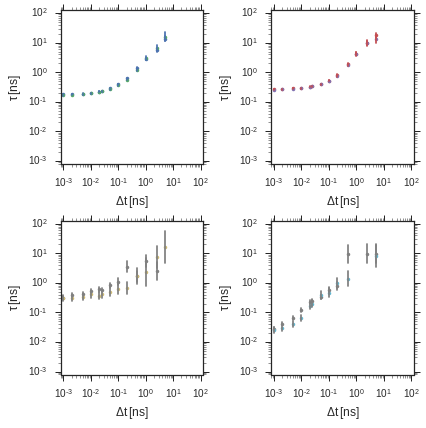

In [20]:
md_dw_colour_l = [cl[0], cl[2],'grey', 'grey']
remd_dw_colour_l = [cl[1], cl[3], cl[4], cl[5]]

fig, ax = plt.subplots(2,2, figsize=(6,6))
for dt, dt_r in md_r_dt_d.items():    
    md_t0 = dt_r[dt_r.temperature==0]
    for i, trans in enumerate(dw_l):
        md_r = md_t0[md_t0.type.isin(trans)]
        _sum = md_r.rate.sum()
        if _sum > 0:
            _tau = 1.0 / _sum
            _N = md_r.sym_weight.sum()
            #print _tau, _tau*np.exp(1/_N**0.5), _tau*np.exp(-1/_N**0.5)
            ax.flat[i].plot(int(dt) / 1000.0, _tau, ".",c=md_dw_colour_l[i])
            ax.flat[i].plot([int(dt) / 1000.0]*2, [ _tau*np.exp(1/_N**0.5), _tau*np.exp(-1/_N**0.5)],
                            "-", c=md_dw_colour_l[i])
            #md_lg = ax.flat[i].errorbar(int(dt) / 1000.0, np.array([_tau]), c=md_dw_colour_l[i], fmt="o",
            #                            yerr=[_tau - 0.59, _tau - 0.65])

for dt, dt_r in remd_r_dt_d.items():    
    md_t0 = dt_r[dt_r.temperature==0]
    for i, trans in enumerate(dw_l):
        md_r = md_t0[md_t0.type.isin(trans)]
        _sum = md_r.rate.sum()
        if _sum > 0:
            _tau = 1.0 / _sum
            _N = md_r.sym_weight.sum()
            #print _tau, _tau*np.exp(1/_N**0.5), _tau*np.exp(-1/_N**0.5)
            ax.flat[i].plot(int(dt) / 1000.0, _tau, ".",c=remd_dw_colour_l[i])
            ax.flat[i].plot([int(dt) / 1000.0]*2, [ _tau*np.exp(1/_N**0.5), _tau*np.exp(-1/_N**0.5)],
                            "-", c=md_dw_colour_l[i])
            
            
for a in ax.flat:

    a.loglog()
    a.set_ylim(10**-3.1, 10**2.1)
    a.set_xlim(10**-3.1, 10**2.1)
    #a.plot([10**-3.1, 10**3.1], np.array([10**-3.1, 10**3.1])**1, "--", c='grey') 
    a.set_xlabel("$\mathregular{\Delta t \, [ns]}$", fontsize=12)
    a.set_ylabel(r"$\mathregular{\tau \, [ns]}$", fontsize=12)
    
fig.tight_layout()

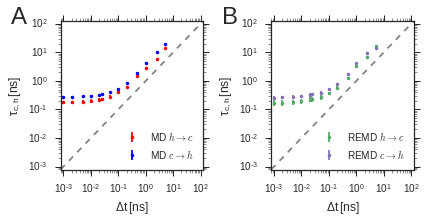

In [21]:
fig, ax = plt.subplots(1,2, figsize=(6,3))

for dt, dt_r in md_r_dt_d.items():
    #print dt
    md_r = dt_r[(dt_r.temperature==0) & (dt_r.type==(0,0,0,1))]
    md_lg = ax[0].errorbar(int(dt) / 1000.0, 1.0 / md_r.rate.values, yerr=[ np.sqrt((md_r.err_m.values / md_r.rate)**2),
                                                          np.sqrt((md_r.err_p.values / md_r.rate)**2)],
                   c='red', fmt="." )
    
    md_r = dt_r[(dt_r.temperature==0) & (dt_r.type==(0,1,0,0))]

    md_lg2 = ax[0].errorbar(int(dt)/ 1000.0, 1.0 / md_r.rate.values, yerr=[np.sqrt((md_r.err_m.values / md_r.rate)**2),
                                                          np.sqrt((md_r.err_p.values / md_r.rate)**2)],
                   c='blue', fmt="." )
    
      
ax[0].legend([md_lg, md_lg2], [r"MD $h \rightarrow c$",
                               r"MD $c \rightarrow h$"],
            loc=4)
        

for dt, dt_r in remd_r_dt_d.items():
    md_r = dt_r[(dt_r.temperature==0) & (dt_r.type==(0,0,0,1))]

    lg_remd= ax[1].errorbar(int(dt) /1000.0, 1.0 / md_r.rate.values,
                   yerr=[ np.sqrt((md_r.err_m.values / md_r.rate)**2),
                          np.sqrt((md_r.err_p.values / md_r.rate)**2)],
                  c=cl[1], fmt="." )
    md_r = dt_r[(dt_r.temperature==0) & (dt_r.type==(0,1,0,0))]
    
    lg_remd2= ax[1].errorbar(int(dt)/ 1000.0, 1.0 / md_r.rate.values,
                             yerr=[ np.sqrt((md_r.err_m.values / md_r.rate)**2),
                                    np.sqrt((md_r.err_p.values / md_r.rate)**2)],
                  c=cl[3], fmt="." )

ax[1].legend([lg_remd, lg_remd2], [r"REMD $h \rightarrow c$",
                               r"REMD $c \rightarrow h$"], loc=4)
    
ax[0].text( 10**-4.9, 10**2,"A", fontsize=24)
ax[1].text( 10**-4.9, 10**2,"B", fontsize=24)

for a in ax:
    a.loglog()
    a.set_ylim(10**-3.1, 10**2.1)
    a.set_xlim(10**-3.1, 10**2.1)
    a.plot([10**-3.1, 10**3.1], np.array([10**-3.1, 10**3.1])**1, "--", c='grey') 
    a.set_xlabel("$\mathregular{\Delta t \, [ns]}$", fontsize=12)
    a.set_ylabel(r"$\mathregular{\tau_{c,h} \, [ns]}$", fontsize=12)
    
fig.tight_layout()
#fig.savefig("ala_md_remd_tau_dt_c.png", dpi=400)
#fig.savefig("alla_md_remd_tau_dt_c.pdf")

## Lagtime independent rate coefficients

assume that Ala2 is a quasi two-state system.

First fit $k$

\begin{equation}
\frac{1}{<\tau_F>_{\text{app}}} + \frac{1}{<\tau_U>_{\text{app}}} =  \frac{1 - \exp(-k t) }{ t}
\end{equation}

Then fit the relative populations.

\begin{equation}
\frac{1}{<\tau_F>_{\text{app}}} = \frac{pU' (1 - \exp(-kt)}{t} = k_{U \leftarrow F}
\end{equation}

### rate arrays

In [22]:
tf = 1.0 / 1000.0

In [23]:
md_lagtime_l = []
md_kc_l, md_kh_l = [], []

for dt in sorted([int(k) for k in md_r_dt_d.keys()]):
    #print dt
    md_lagtime_l.append(dt)
    dt_r = md_r_dt_d[str(dt)]
    md_kh_l.extend(dt_r[(dt_r.temperature==0) & (dt_r.type==(0,1,0,0))].rate.values)
    md_kc_l.extend(dt_r[(dt_r.temperature==0) & (dt_r.type==(0,0,0,1))].rate.values)    
md_kc_ar = np.array(md_kc_l)
md_kh_ar = np.array(md_kh_l)
md_kc_kh_ar = md_kc_ar + md_kh_ar

md_lagtime_ar = np.array(md_lagtime_l)

In [24]:
remd_lagtime_l = []
remd_kc_l, remd_kh_l = [], []
for dt in sorted([int(k) for k in remd_r_dt_d.keys()]):
    remd_lagtime_l.append(dt)
    dt_r = remd_r_dt_d[str(dt)]
    remd_kh_l.extend(dt_r[(dt_r.temperature==0) & (dt_r.type==(0,1,0,0))].rate.values)
    remd_kc_l.extend(dt_r[(dt_r.temperature==0) & (dt_r.type==(0,0,0,1))].rate.values)
remd_kc_ar = np.array(remd_kc_l)
remd_kh_ar = np.array(remd_kh_l)
remd_kc_kh_ar = remd_kc_ar + remd_kh_ar
remd_lagtime_ar = np.array(remd_lagtime_l)

### fit $1/k_{ex = }1/k_c + 1/ k_h$ 

In [25]:
popt_kex_remd = curve_fit(sum_inv_lifetimes_two_state_lagtime,
                         remd_lagtime_ar[:]*tf, remd_kc_kh_ar[:], p0=10)
kex_fit_remd = popt_kex_remd[0][0]
print popt_kex_remd

(array([ 8.87243231]), array([[ 0.09071566]]))


In [26]:
popt = curve_fit(sum_inv_lifetimes_two_state_lagtime, md_lagtime_ar[:]*tf, md_kc_kh_ar[:], p0=[10.0]) 
print popt
k_ex_fit = popt[0][0]

(array([ 8.54260282]), array([[ 0.09270747]]))


In [27]:
md_r_dt_d['1'][(md_r_dt_d['1'].temperature==0) & (md_r_dt_d['1'].type==(0,0,0,1))].rate, \
md_r_dt_d['1'][(md_r_dt_d['1'].temperature==0) & (md_r_dt_d['1'].type==(0,1,0,0))].rate

(0    5.565691
 Name: rate, dtype: float64, 36    3.676874
 Name: rate, dtype: float64)

In [28]:
md_kc_kh_ar

array([ 9.24256456,  9.08735196,  8.79415798,  8.35937817,  7.60653429,
        7.29720765,  6.07102677,  4.43502331,  2.77705138,  1.21380732,
        0.57873921,  0.26881593,  0.12543172])

In [29]:
md_lagtime_ar/ 1000.0

array([  1.00000000e-03,   2.00000000e-03,   5.00000000e-03,
         1.00000000e-02,   2.00000000e-02,   2.50000000e-02,
         5.00000000e-02,   1.00000000e-01,   2.00000000e-01,
         5.00000000e-01,   1.00000000e+00,   2.50000000e+00,
         5.00000000e+00])

In [30]:
sum_inv_lifetimes_two_state_lagtime(md_lagtime_ar / 1000.0, k_ex_fit)

array([ 8.50621847,  8.4700406 ,  8.36273269,  8.18789444,  7.85268637,
        7.69201596,  6.95242709,  5.74402103,  4.09433215,  1.9720728 ,
        0.99980502,  0.4       ,  0.2       ])

[]

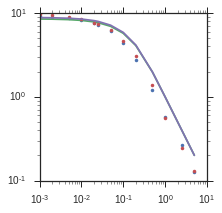

In [31]:
fig, ax = plt.subplots(figsize=(3,3))
plt.plot(md_lagtime_ar / 1000.0, md_kc_kh_ar, ".")
plt.plot(md_lagtime_ar/ 1000.0, sum_inv_lifetimes_two_state_lagtime(md_lagtime_ar*tf, k_ex_fit))

plt.plot(remd_lagtime_ar / 1000.0, remd_kc_kh_ar, ".")
plt.plot(remd_lagtime_ar/ 1000.0, sum_inv_lifetimes_two_state_lagtime(remd_lagtime_ar*tf, kex_fit_remd))

plt.loglog()

### $p'$ fit to determine lagtime independent rate coefficients and populations
#### MD

In [32]:
f = lambda  t, p : inv_lifetime_two_state_lagtime(t, p, k_ex_fit)

In [33]:
popt_pc = curve_fit(f, md_lagtime_ar[:] / 1000.0, md_kc_ar[:])
print popt_pc

popt_ph = curve_fit(f, md_lagtime_ar[:]/1000.0, md_kh_ar[:])
print popt_ph

(array([ 0.58381003]), array([[ 0.00045066]]))
(array([ 0.39740205]), array([[ 0.00011567]]))


In [34]:
pc = popt_pc[0][0] / (popt_pc[0][0] + popt_ph[0][0])
ph = popt_ph[0][0] / (popt_pc[0][0] + popt_ph[0][0])

In [35]:
k_ex_fit * pc, k_ex_fit * ph

(5.0827515524634252, 3.4598512720013197)

In [36]:
md_r_dt_d['1'][(md_r_dt_d['1'].temperature==0) & (md_r_dt_d['1'].type.isin([(0,0,0,1), (0,1,0,0)]))]

,temperature,type,rate,events,sum_weight,rev_events,rev_sum_weight,sym_weight,std_p,std_m,err_m,err_p
0,0,"(0, 0, 0, 1)",5.565691,965,965,964,964,1929,5.693867,5.440401,0.125291,0.128176
36,0,"(0, 1, 0, 0)",3.676874,964,964,965,965,1929,3.761551,3.594103,0.082771,0.084677


In [37]:
inv_lifetime_two_state_lagtime(
        md_lagtime_ar*tf, popt_pc[0][0], k_ex_fit)

array([ 4.96601565,  4.94489464,  4.88224721,  4.78017489,  4.58447705,
        4.49067606,  4.05889666,  3.35341708,  2.39031217,  1.15131588,
        0.5836962 ,  0.23352401,  0.11676201])

#### REMD

In [38]:
f_remd = lambda t, p: inv_lifetime_two_state_lagtime(t, p, kex_fit_remd)

In [39]:
popt_pc_remd = curve_fit(f, remd_lagtime_ar[:]*tf, remd_kc_ar[:])
print popt_pc_remd
popt_ph_remd = curve_fit(f, remd_lagtime_ar[:]*tf, remd_kh_ar[:])
print popt_ph_remd
pc_remd = popt_pc_remd[0][0] / (popt_pc_remd[0][0] + popt_ph_remd[0][0])
ph_remd = popt_ph_remd[0][0] / (popt_pc_remd[0][0] + popt_ph_remd[0][0])
print pc_remd, ph_remd

(array([ 0.60907356]), array([[ 0.00046667]]))
(array([ 0.40725638]), array([[ 0.00013211]]))
0.599287235024 0.400712764976


In [40]:
kex_fit_remd * pc, kex_fit_remd * ph

(5.2789963439702952, 3.5934359622051137)

### test plot

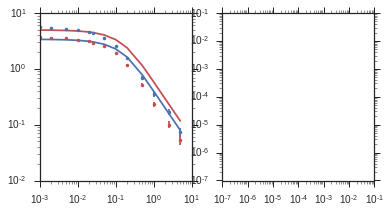

In [41]:
fig, ax = plt.subplots(1,2, figsize=(6,3))

# 1/tau_c = k_c
ax[0].plot(md_lagtime_ar*tf, inv_lifetime_two_state_lagtime(
        md_lagtime_ar*tf, popt_ph[0][0], k_ex_fit), "-",
          c=cl[0])

ax[0].plot(md_lagtime_ar*tf, inv_lifetime_two_state_lagtime(
        md_lagtime_ar*tf, popt_pc[0][0], k_ex_fit),
          c=cl[2])

for dt, dt_r in md_r_dt_d.items():
    md_r = dt_r[(dt_r.temperature==0) & (dt_r.type==(0,0,0,1))]
    md_lg = ax[0].errorbar(int(dt)*tf,  md_r.rate.values, yerr=[md_r.err_m.values ,
                                                              md_r.err_p.values ],
                   c=cl[0], fmt=".", label=r"$h \rightarrow c$")
    
    md_r = dt_r[(dt_r.temperature==0) & (dt_r.type==(0,1,0,0))]
    md_lg2 = ax[0].errorbar(int(dt)*tf,  md_r.rate.values, yerr=[md_r.err_m.values ,
                                                                  md_r.err_p.values ],
                   c=cl[2], fmt=".", label=r"$c \rightarrow h$" )
    
for a in ax:
    a.loglog()

### Plot
* show minor states? (what colours?)
* error bars
* check that assignment of curves to transitions (are the labels right?)

For helical and coil states, I could also show the summed lifetimes.

In [42]:
syn_ar = np.genfromtxt("from-syn-trj/syn_dt_ala_st3_st4.txt")

In [43]:
fig_l = ["A", "B", "C", "D"]

In [44]:
! mkdir -p plots
!ls

ala_md_remd_r_dt_1.pdf	 ala_md_remd_r_t.png	    dt_rates_init.ipynb
ala_md_remd_r_dt_1.png	 ala_md_remd_tau_dt_2.png   dt_rates.ipynb
ala_md_remd_r_dt_c1.pdf  ala_md_remd_tau_dt_c.png   expon
ala_md_remd_r_dt_c1.png  ala_md_remd_tau_dt.png     from-syn-trj
ala_md_remd_r_dt_c2.pdf  alla_md_remd_r_dt.pdf	    lifetime_ar
ala_md_remd_r_dt_c2.png  alla_md_remd_tau_dt_2.pdf  lifetime_ar.tar.gz
ala_md_remd_r_dt_c3.pdf  alla_md_remd_tau_dt_c.pdf  nohup.out
ala_md_remd_r_dt_c3.png  alla_md_remd_tau_dt.pdf    plots
ala_md_remd_r_dt.pdf	 alla_md_remd_tdt.pdf
ala_md_remd_r_dt.png	 av_tau


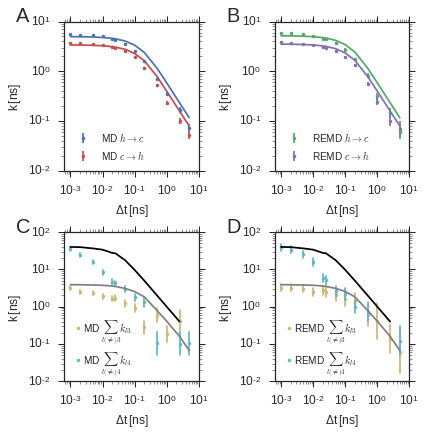

In [45]:
fig, ax = plt.subplots(2,2, figsize=(6,6))

#mfpt h
ax[0,0].plot(md_lagtime_ar*tf, inv_lifetime_two_state_lagtime(
        md_lagtime_ar*tf, popt_ph[0][0], k_ex_fit), "-",
          c=cl[2])
#mfpt c
ax[0,0].plot(md_lagtime_ar*tf, inv_lifetime_two_state_lagtime(
        md_lagtime_ar*tf, popt_pc[0][0], k_ex_fit),
          c=cl[0])


for dt, dt_r in md_r_dt_d.items():
    md_r = dt_r[(dt_r.temperature==0) & (dt_r.type==(0,0,0,1))]
    md_lg = ax[0,0].errorbar(int(dt)*tf,  md_r.rate.values, yerr=[md_r.err_m.values ,
                                                              md_r.err_p.values ],
                   c=cl[0], fmt=".", label=r"$h \rightarrow c$")
    
    md_r = dt_r[(dt_r.temperature==0) & (dt_r.type==(0,1,0,0))]
    md_lg2 = ax[0,0].errorbar(int(dt)*tf,  md_r.rate.values, yerr=[md_r.err_m.values ,
                                                                  md_r.err_p.values ],
                   c=cl[2], fmt=".", label=r"$c \rightarrow h$" )
      
ax[0,0].legend([md_lg, md_lg2], [r"MD $h \rightarrow c$",
                               r"MD $c \rightarrow h$"],
            loc=3)


for dt, dt_r in remd_r_dt_d.items():
    md_r = dt_r[(dt_r.temperature==0) & (dt_r.type==(0,0,0,1))]
    lg_remd = ax[0,1].errorbar(int(dt)*tf,  md_r.rate.values, yerr=[ md_r.err_m.values ,
                                                                   md_r.err_p.values ],
                  c=cl[1], fmt=".",  label=r"$h \rightarrow c$")
    md_r = dt_r[(dt_r.temperature==0) & (dt_r.type==(0,1,0,0))]
    
    lg_remd2 = ax[0,1].errorbar(int(dt)*tf,  md_r.rate.values, yerr=[md_r.err_m.values ,
                                                          md_r.err_p.values ],
                  c=cl[3], fmt=".", label=r"$c \rightarrow h$" )

ax[0,1].legend([lg_remd, lg_remd2], [r"REMD $h \rightarrow c$",
                               r"REMD $c \rightarrow h$"], loc=3)

# mfpt h
ax[0,1].plot(remd_lagtime_ar*tf, inv_lifetime_two_state_lagtime(
    remd_lagtime_ar*tf, popt_ph[0][0], kex_fit_remd),
          c=cl[3])
# mfpt c
ax[0,1].plot(remd_lagtime_ar*tf, inv_lifetime_two_state_lagtime(
    remd_lagtime_ar*tf, popt_pc[0][0], kex_fit_remd),
          c=cl[1])

# minor states: light blue and grey?
for dt, dt_r in md_r_dt_d.items():
    md_r = dt_r[(dt_r.temperature==0) & (dt_r.type.isin(trans_from_10))]
    _sum = md_r.rate.sum()
    if _sum > 0:
        _N = md_r.sym_weight.sum()
        lg3, = ax[1,0].plot(int(dt)*tf, _sum, ".",c=cl[4])
        ax[1,0].plot([int(dt)*tf]*2, [ _sum*np.exp(1/_N**0.5), _sum*np.exp(-1/_N**0.5)],
                            "-", c=cl[4])

for dt, dt_r in md_r_dt_d.items():
    md_r = dt_r[(dt_r.temperature==0) & (dt_r.type.isin(trans_from_11))]
    _sum = md_r.rate.sum()
    if _sum > 0:
        _N = md_r.sym_weight.sum()
        lg4, = ax[1,0].plot(int(dt)*tf, _sum, ".",c=cl[5])
        ax[1,0].plot([int(dt)*tf]*2, [ _sum*np.exp(1/_N**0.5), _sum*np.exp(-1/_N**0.5)],
                            "-", c=cl[5])
        
ax[1,0].legend([lg3, lg4], [r'MD $\sum_{l(\neq)3}k_{l3}$',
                           r'MD $\sum_{l(\neq)4}k_{l4}$'],
               loc=3, handletextpad=-0.5,handleheight=0.5,
              borderaxespad=0.01)
        
for dt, dt_r in remd_r_dt_d.items():
    md_r = dt_r[(dt_r.temperature==0) & (dt_r.type.isin(trans_from_10))]
    _sum = md_r.rate.sum()
    if _sum > 0:
        #_tau = 1.0 / _sum
        _N = md_r.sym_weight.sum()
        lg3, = ax[1,1].plot(int(dt)*tf, _sum, ".",c=cl[4])
        ax[1,1].plot([int(dt)*tf]*2, [ _sum*np.exp(1/_N**0.5), _sum*np.exp(-1/_N**0.5)],
                            "-", c=cl[4])        

for dt, dt_r in remd_r_dt_d.items():
    md_r = dt_r[(dt_r.temperature==0) & (dt_r.type.isin(trans_from_11))]
    _sum = md_r.rate.sum()
    if _sum > 0:
        _N = md_r.sym_weight.sum()
        lg4, = ax[1,1].plot(int(dt)*tf, _sum, ".",c=cl[5])
        ax[1,1].plot([int(dt)*tf]*2, [ _sum*np.exp(1/_N**0.5), _sum*np.exp(-1/_N**0.5)],
                            "-", c=cl[5])

ax[1,1].legend([lg3, lg4], [r'REMD $\sum_{l(\neq)3}k_{l3}$',
                           r'REMD $\sum_{l(\neq)4}k_{l4}$'],
               loc=3, handletextpad=-0.5,handleheight=0.5,
              borderaxespad=0.01)
            
ax[1,0].plot(syn_ar[:,0], syn_ar[:,1], c='grey')
ax[1,0].plot(syn_ar[:,0], syn_ar[:,2], c='black')    
ax[1,1].plot(syn_ar[:,0], syn_ar[:,1], c='grey')
ax[1,1].plot(syn_ar[:,0], syn_ar[:,2], c='black')
    

for a in ax.flat:
    a.loglog()
    a.set_xlabel("$\mathregular{\Delta t \, [ns]}$", fontsize=12)
    a.set_xlim(10**-3.2, 10**1)
    a.tick_params(axis='both', which='major', labelsize=12)
    
for i, a in enumerate(fig_l[:2]):
    ax.flat[i].text(10**-4.7, 10**1, a, fontsize=20)
    ax.flat[i].set_ylabel(r"$\mathregular{k \, [ns]}$", fontsize=12)

    
for i, a in enumerate(fig_l[2:]):
    ax.flat[i+2].text(10**-4.7, 10**2, a, fontsize=20)
    ax.flat[i+2].set_ylabel(r"$\mathregular{k \, [ns]}$", fontsize=12)
    
    
    
fig.tight_layout()
fig.savefig("plots/k_fit_all2.png", dpi=600)
fig.savefig("plots/k_fit_ala2.pdf" )

### Minor states
* prepare arrays?
* fit data

[]

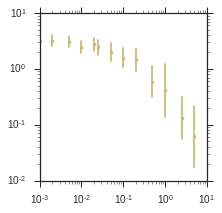

In [46]:
fig, ax = plt.subplots(figsize=(3,3))
for dt, dt_r in remd_r_dt_d.items():
    md_r = dt_r[(dt_r.temperature==0) & (dt_r.type.isin(trans_from_10))]
    _sum = md_r.rate.sum()
    if _sum > 0:
        #_tau = 1.0 / _sum
        _N = md_r.sym_weight.sum()
        lg3, = ax.plot(int(dt)*tf, _sum, ".",c=cl[4])
        ax.plot([int(dt)*tf]*2, [ _sum*np.exp(1/_N**0.5), _sum*np.exp(-1/_N**0.5)],
                            "-", c=cl[4])  

plt.loglog()

### Parameter comparison

In [47]:
remd_dt1_pt = pd.read_pickle("../dt1/remd_dt1/ala_remd_st1_dt1ps__6jan16_pop.pickle")
remd_dt1_pt[(remd_dt1_pt.temperature==0) ]

,temperature,"(0, 0)","(0, 1)","(1, 0)","(1, 1)"
0,0,0.385587,0.590193,0.022453,0.001767


In [48]:
print pc_remd, ph_remd

0.599287235024 0.400712764976


In [49]:
print pc, ph

0.594988630152 0.405011369848


## Looking at some observation intervals

In [50]:
remd_r_dt_d['10'][(remd_r_dt_d['10'].temperature==0) & (remd_r_dt_d['10'].type==(0,0,0,1))]

,temperature,type,rate,events,sum_weight,rev_events,rev_sum_weight,sym_weight,std_p,std_m,err_m,err_p
0,0,"(0, 0, 0, 1)",5.152059,457,300.810137,470,303.934524,604.744661,5.365882,4.946756,0.205303,0.213823


In [51]:
remd_r_dt_d['100'][(remd_r_dt_d['100'].temperature==0) & (remd_r_dt_d['100'].type==(0,0,0,1))]

,temperature,type,rate,events,sum_weight,rev_events,rev_sum_weight,sym_weight,std_p,std_m,err_m,err_p
0,0,"(0, 0, 0, 1)",2.71739,351,159.202489,362,170.142929,329.345418,2.871328,2.571704,0.145685,0.153938


In [52]:
md_r_dt_d['10'][(md_r_dt_d['10'].temperature==0) & (md_r_dt_d['10'].type==(0,0,0,1))]

,temperature,type,rate,events,sum_weight,rev_events,rev_sum_weight,sym_weight,std_p,std_m,err_m,err_p
0,0,"(0, 0, 0, 1)",5.003192,875,875,875,875,1750,5.124232,4.885011,0.118181,0.12104


In [53]:
md_r_dt_d['50'][(md_r_dt_d['50'].temperature==0) & (md_r_dt_d['50'].type==(0,0,0,1))]

,temperature,type,rate,events,sum_weight,rev_events,rev_sum_weight,sym_weight,std_p,std_m,err_m,err_p
0,0,"(0, 0, 0, 1)",3.527203,643,643,644,644,1287,3.626906,3.430241,0.096962,0.099703


In [54]:
md_r_dt_d['100'][(md_r_dt_d['100'].temperature==0) & (md_r_dt_d['100'].type==(0,0,0,1))]

,temperature,type,rate,events,sum_weight,rev_events,rev_sum_weight,sym_weight,std_p,std_m,err_m,err_p
0,0,"(0, 0, 0, 1)",2.531099,473,473,473,473,946,2.614745,2.450129,0.08097,0.083646


In [55]:
md_r_dt_d['2500'][(md_r_dt_d['2500'].temperature==0) & (md_r_dt_d['2500'].type==(0,0,0,1))]

,temperature,type,rate,events,sum_weight,rev_events,rev_sum_weight,sym_weight,std_p,std_m,err_m,err_p
0,0,"(0, 0, 0, 1)",0.16897,27,27,27,27,54,0.193602,0.147472,0.021498,0.024632


# Second moment of lifetime distribution

How exponential are the lifetime distributions?

\begin{equation}
\frac{<\tau^2> - <\tau>^2}{<\tau>^2} =1
\end{equation}


## MD

In [56]:
%%capture l

! ls ../dt*/md_dt*/


In [57]:
%%capture l
! ls ../dt*/md_dt*/*__6jan16_blNone_tp.pickle

In [58]:
dt_key_l = list(md_r_dt_d.keys())
#dt_key_l.remove("1")

In [59]:
md_dt_tp_d = {}
md_dt_state_d = {}

#for key in md_r_dt_d.keys():
for key in dt_key_l:
    #print "../dt{}/md*/*blNone_tp.pickle".format(dt)
    #dt_tp_l  = [glob.glob("../dt{}/md*/md_st{}*blNone_tp.pickle".format(dt,st))[0] for st in range(1,4)]
    _dt_tp_l = []
    _dt_st_l = []
    for st in range(1,4):
        _dt_tp_l.extend(glob.glob("../dt{}/md*/md_st{}*__6jan16_blNone_tp.pickle".format(key,st)))
        _dt_st_l.extend(glob.glob("../dt{}/md*/md_st{}*__6jan16_blNone_tba.pickle".format(key,st)))
    md_dt_tp_d[key] = _dt_tp_l
    md_dt_state_d[key] = _dt_st_l
    
    #dt_tp_l = glob.glob("../dt{}/md*/md_st{}*blNone_tp.pickle".format(dt))
    #print dt_tp_l

need to load tp and state dataframes, for each dt value and each of the three stages.

In [60]:
md_dt_hdw_d = {}
md_dt_cdw_d = {}
md_dt_11dw_d = {}
md_dt_10dw_d = {}

bar = pyprind.ProgBar(len(dt_key_l)*3)

for k, v in md_dt_tp_d.items():
    _tba = md_dt_state_d[k]
    print k
    md_h_l = []
    md_c_l = []
    md_11_l = []
    md_10_l = []
    
    for i, _tp_fn in enumerate(v):
        _st_fn = _tba[i]
        
        _tp_df = pd.read_pickle(_tp_fn)
        _st_df = pd.read_pickle(_st_fn)
        
        _tp_df0 = _tp_df[_tp_df.temperature==0]
        _st_df0 = _st_df[_st_df.temperature==0]
        
        _dw_h = loop_dwell_trans_temp(_tp_df0,
                                      _st_df0, trans_from_h, tu=float(k))
        md_h_l.append(_dw_h)
        _dw_c = loop_dwell_trans_temp(_tp_df0,
                                      _st_df0, trans_from_c, tu=float(k))
        md_c_l.append(_dw_c)
        
        # lifetimes in the minor states
        
        _dw_10 = loop_dwell_trans_temp(_tp_df0,
                                      _st_df0, trans_from_10, tu=float(k))
        md_10_l.append(_dw_10)
        
        _dw_11 = loop_dwell_trans_temp(_tp_df0,
                                      _st_df0, trans_from_11, tu=float(k))
        md_11_l.append(_dw_11)
        
    
    md_dt_hdw_d[k] = pd.concat(md_h_l)
    md_dt_cdw_d[k] = pd.concat(md_c_l)
    md_dt_10dw_d[k] = pd.concat(md_10_l)
    md_dt_11dw_d[k] = pd.concat(md_11_l)
    
    bar.update()

0%                          100%
[                              ]

200
5000

[#                             ] | ETA: 00:01:25


20

[##                            ] | ETA: 00:03:05


10

[###                           ] | ETA: 00:04:01


50
1

[####                          ] | ETA: 00:05:11


2

[#####                         ] | ETA: 00:05:33


5

[######                        ] | ETA: 00:05:35


25
100

[#######                       ] | ETA: 00:05:00


2500

[########                      ] | ETA: 00:04:25


500

[#########                     ] | ETA: 00:03:59


1000


In [61]:
_blog = np.logspace(-3,1, 5000)

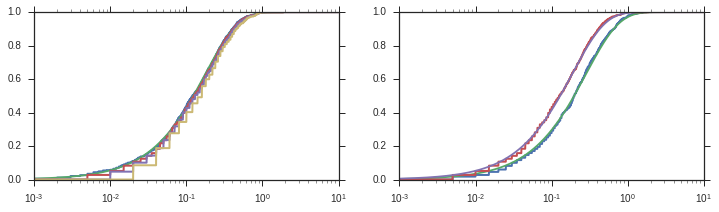

In [62]:
fig, ax = plt.subplots(1,2, figsize=(12,3))

tf = 1.0 / 1000

_ = fit_plot_cdf(ax[0], md_dt_hdw_d['1'].wait_T * tf, bins=_blog)
_ = fit_plot_cdf(ax[0], md_dt_hdw_d['5'].wait_T * tf, bins=_blog, plot_fit=False)
_ = fit_plot_cdf(ax[0], md_dt_hdw_d['10'].wait_T * tf, bins=_blog, plot_fit=False)

_ = fit_plot_cdf(ax[0], md_dt_hdw_d['20'].wait_T * tf, bins=_blog, plot_fit=False)

_ = fit_plot_cdf(ax[1], md_dt_cdw_d['5'].wait_T * tf, bins=_blog)
_ = fit_plot_cdf(ax[1], md_dt_hdw_d['5'].wait_T * tf, bins=_blog)

#_ = fit_plot_cdf(ax[1], md_dt_cdw_d['10'].wait_T * tf, bins=_blog, plot_fit=False)
#_ = fit_plot_cdf(ax[1], md_dt_cdw_d['20'].wait_T * tf, bins=_blog, plot_fit=False)

for a in ax:
    a.semilogx()

In [63]:
np.mean( (md_dt_hdw_d['1'].wait_T.values / 1000.0))**2, np.mean((md_dt_hdw_d['1'].wait_T.values / 1000.0)**2)

(0.031339272344492457, 0.062990794818652857)

In [64]:
 np.mean((md_dt_hdw_d['2'].wait_T.values / 1000.0))**2, np.mean((md_dt_hdw_d['2'].wait_T.values / 1000.0)**2)


(0.032181108575273634, 0.064244387776606959)

In [65]:
  (np.mean((md_dt_hdw_d['2'].wait_T.values / 1000.0)**2) - np.mean((md_dt_hdw_d['2'].wait_T.values / 1000.0))**2) / np.mean((md_dt_hdw_d['2'].wait_T.values / 1000.0))**2

0.99633855453845854

In [66]:
  (np.mean((md_dt_cdw_d['2'].wait_T.values / 1000.0)**2) - np.mean((md_dt_cdw_d['2'].wait_T.values / 1000.0))**2) / np.mean((md_dt_cdw_d['2'].wait_T.values / 1000.0))**2

0.9386983526467505

In [67]:
md_r_dt_d['2'][(md_r_dt_d['2'].temperature==0) & (md_r_dt_d['2'].type==(0,0,0,1))]

,temperature,type,rate,events,sum_weight,rev_events,rev_sum_weight,sym_weight,std_p,std_m,err_m,err_p
0,0,"(0, 0, 0, 1)",5.470084,949,949,948,948,1897,5.597129,5.345924,0.124161,0.127044


200 0.935154622657
5000 0.836762688615
20 0.884312109007
10 0.950875362757
50 0.79603216747
1 1.00996354115
2 0.996338554538
5 0.973786170209
25 0.903920504617
100 0.847097685423
1000 0.890311111111
500 0.76576491658
2500 0.474817377932


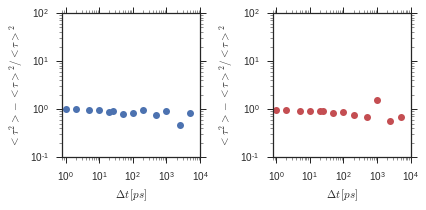

In [68]:
fig, ax = plt.subplots(1,2, figsize=(6,3))

for k, v in md_dt_hdw_d.items():
    
    msq_tau = np.mean(v.wait_T.values**2)
    sqm_tau = np.mean(v.wait_T.values)**2
    
    _exp = (msq_tau - sqm_tau)/ sqm_tau
    
    print k,_exp
    
    ax[0].plot(k, _exp , "o", c=cl[0])   
    
    
for k, v in md_dt_cdw_d.items():
    
    msq_tau = np.mean(v.wait_T.values**2)
    sqm_tau = np.mean(v.wait_T.values)**2
    
    _exp = (msq_tau - sqm_tau)/ sqm_tau
    
    #print k,_exp
    
    ax[1].plot(k, _exp , "o", c=cl[2])   
    
ax[0].semilogx()
ax[1].semilogx()

for a in ax:
    a.loglog()
    a.set_ylim(10**-1, 10**2)
    a.set_xlim(10**-0.1, 10**4)
    a.set_ylabel(r"$< \tau^2> - <\tau>^2/<\tau>^2$")
    a.set_xlabel("$\Delta t \, [ps]$")
fig.tight_layout()

### observation interval dependence for the lifetime in the helical state in MD

1.86


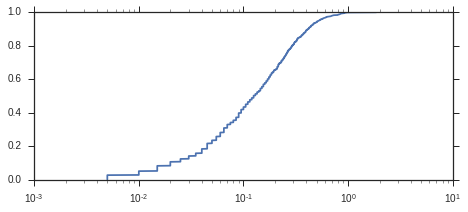

In [69]:
fig, ax = plt.subplots(figsize=(7.5,3))

x,y = cumulative_hist_binfree(md_dt_hdw_d['5'].wait_T * tf)
plt.plot(x,y)
plt.semilogx()

print x.max()

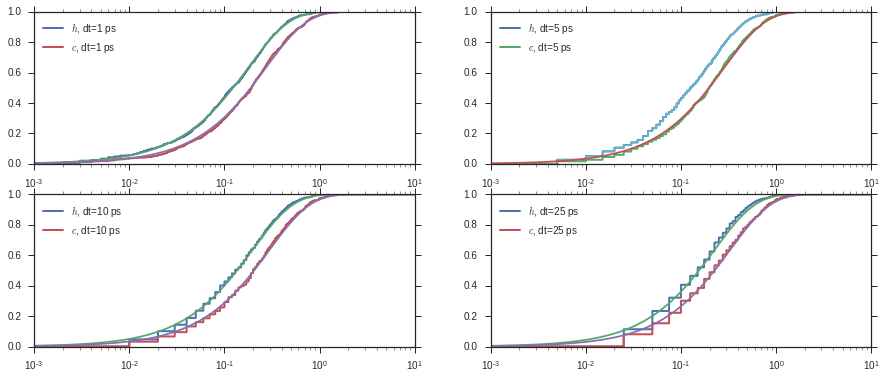

In [70]:
fig, ax = plt.subplots(2,2, figsize=(15,6))

tf = 1.0 / 1000

_ = fit_plot_cdf(ax[0,0], md_dt_hdw_d['1'].wait_T * tf, bins=_blog,
                dist_label="$h$, dt=1 ps", )
_ = fit_plot_cdf(ax[0,1], md_dt_hdw_d['5'].wait_T * tf, bins=_blog, plot_fit=False,
                dist_label="$h$, dt=5 ps")
ax[0,1].plot(x,y, c=cl[5])
 
_ = fit_plot_cdf(ax[1,0], md_dt_hdw_d['10'].wait_T * tf, bins=_blog, plot_fit=True,
                dist_label="$h$, dt=10 ps")

_ = fit_plot_cdf(ax[1,1], md_dt_hdw_d['25'].wait_T * tf, bins=_blog, plot_fit=True,
                dist_label="$h$, dt=25 ps")
#_ = fit_plot_cdf(ax[2,1], md_dt_hdw_d['50'].wait_T * tf, bins=_blog, plot_fit=True)


_ = fit_plot_cdf(ax[0,0], md_dt_cdw_d['1'].wait_T * tf, bins=_blog,
                dist_label="$c$, dt=1 ps")
_ = fit_plot_cdf(ax[0,1], md_dt_cdw_d['5'].wait_T * tf, bins=_blog, plot_fit=True,
                dist_label="$c$, dt=5 ps")
_ = fit_plot_cdf(ax[1,0], md_dt_cdw_d['10'].wait_T * tf, bins=_blog, plot_fit=True,
                dist_label="$c$, dt=10 ps")

_ = fit_plot_cdf(ax[1,1], md_dt_cdw_d['25'].wait_T * tf, bins=_blog, plot_fit=True,
                dist_label="$c$, dt=25 ps")
#_ = fit_plot_cdf(ax[2,1], md_dt_cdw_d['50'].wait_T * tf, bins=_blog, plot_fit=True)


for a in ax.flat:
    a.semilogx()
    a.legend(loc=2)

In [71]:
md_dt_hdw_d['5'].wait_T.describe(), md_dt_hdw_d['1'].wait_T.describe(), md_dt_hdw_d['10'].wait_T.describe()

(count     920.000000
 mean      183.554348
 std       181.231062
 min         5.000000
 25%        55.000000
 50%       125.000000
 75%       255.000000
 max      1860.000000
 Name: wait_T, dtype: float64, count     965.000000
 mean      177.029016
 std       178.001000
 min         1.000000
 25%        53.000000
 50%       120.000000
 75%       251.000000
 max      1869.000000
 Name: wait_T, dtype: float64, count     875.000000
 mean      190.720000
 std       186.082849
 min        10.000000
 25%        60.000000
 50%       130.000000
 75%       265.000000
 max      1860.000000
 Name: wait_T, dtype: float64)

In [72]:
md_dt_hdw_d['1'].wait_T.var() / md_dt_hdw_d['1'].wait_T.mean()**2, md_dt_hdw_d['1'].wait_T.var(), md_dt_hdw_d['1'].wait_T.mean()

(1.0110112211736162, 31684.356003697863, 177.02901554404144)

In [73]:
md_dt_hdw_d['5'].wait_T.var() / md_dt_hdw_d['5'].wait_T.mean()**2, md_dt_hdw_d['5'].wait_T.var(),  md_dt_hdw_d['5'].wait_T.mean()

(0.9748457851926746, 32844.697804797244, 183.55434782608697)

In [74]:
md_dt_hdw_d['5'][md_dt_hdw_d['5'].wait_T == 30365]

,temperature,type,traj,start,stop,weight,wait_T,wait,prev_state


In [75]:
md_dt_hdw_d['1'][md_dt_hdw_d['1'].wait_T == 1869]

,temperature,type,traj,start,stop,weight,wait_T,wait,prev_state
159,0,"(0.0, 0.0, 0.0, 1.0)",0,372727,374670,1,1869,1943,NaN


In [76]:
md_dt_state_d['5']

['../dt5/md_dt5_st1/md_st1md_dt5__6jan16_blNone_tba.pickle',
 '../dt5/md_dt5_st2/md_st2md_dt5__6jan16_blNone_tba.pickle',
 '../dt5/md_dt5_st3/md_st3md_dt5__6jan16_blNone_tba.pickle']

In [77]:
md_dt5_st_st3 = pd.read_pickle(md_dt_state_d['5'][2])

md_dt5_tp_st1 = pd.read_pickle(md_dt_tp_d['5'][0])
md_dt5_tp_st2 = pd.read_pickle(md_dt_tp_d['5'][1])
md_dt5_tp_st3 = pd.read_pickle(md_dt_tp_d['5'][2])

In [78]:
md_dt5_tp_st3[(md_dt5_tp_st3.temperature==0) & (md_dt5_tp_st3.type==(0,0,0,1)) & (md_dt5_tp_st3.start==372716)]

,temperature,type,traj,start,stop,fraction
0,0,"(0.0, 0.0, 0.0, 1.0)",0,372716,372736,1


In [79]:
test_dt5_dw_st3 = loop_dwell_trans_temp(md_dt5_tp_st3, md_dt5_st_st3, [(0,0,0,1)], tu=5.0, verbose=True)

[(0.0, 0.0, 0.0, 1.0)]
4
[(0.0, 0.0, 0.0, 1.0)]
4
[(0.0, 0.0, 0.0, 1.0)]
4
[(0.0, 0.0, 0.0, 1.0)]
4
[(0.0, 0.0, 0.0, 1.0)]
4
[(0.0, 0.0, 0.0, 1.0)]
4
[(0.0, 0.0, 0.0, 1.0)]
4
[(0.0, 0.0, 0.0, 1.0)]
4
[(0.0, 0.0, 0.0, 1.0)]
4
[(0.0, 0.0, 0.0, 1.0)]
4
[(0.0, 0.0, 0.0, 1.0)]
4
[(0.0, 0.0, 0.0, 1.0)]
4


In [80]:
test_dt5_dw_st3[(test_dt5_dw_st3.temperature==0) & (test_dt5_dw_st3.stop==372716)]

,temperature,type,traj,start,stop,weight,wait_T,wait,prev_state
149,0,"(0.0, 0.0, 0.0, 1.0)",0,372136,372716,1,405,580,NaN


In [81]:
md_dt5_tp_st3[(md_dt5_tp_st3.temperature==0) & (md_dt5_tp_st3.start==372716) ]

,temperature,type,traj,start,stop,fraction
0,0,"(0.0, 0.0, 0.0, 1.0)",0,372716,372736,1


In [82]:
for ri, row in md_dt5_tp_st3[(md_dt5_tp_st3.temperature==0) & (md_dt5_tp_st3.type==(0,0,0,1))].sort_values(by='start').iterrows():
    if ri==0:
        print ri, row

0 temperature                       0
type           (0.0, 0.0, 0.0, 1.0)
traj                              0
start                        372716
stop                         372736
fraction                          1
Name: 0, dtype: object


In [83]:
md_r_dt_d['50'][(md_r_dt_d['50'].temperature==0) & (md_r_dt_d['50'].type==(0,0,0,1)) ].rate, md_r_dt_d['1'][(md_r_dt_d['1'].temperature==0) & (md_r_dt_d['1'].type==(0,0,0,1)) ].rate

(0    3.527203
 Name: rate, dtype: float64, 0    5.565691
 Name: rate, dtype: float64)

In [84]:
1.0 /(md_dt_hdw_d['50'].wait.mean()/ 1000), md_dt_hdw_d['10'].wait.mean(), md_dt_hdw_d['5'].wait.mean(), 1.0 / (md_dt_hdw_d['1'].wait.mean() /1000)

(0.7704704056813818, 1003.592, 963.8021739130435, 1.0796707507683565)

Problem in calculation stems from a single event. The event is very long, skewing the variance, but does not change the shape of the CDF.

In [85]:
md_dt_cdw_d['50'].wait.mean(), md_dt_cdw_d['10'].wait.mean(), md_dt_cdw_d['5'].wait.mean(), md_dt_cdw_d['1'].wait.mean()

(1292.905864197531, 998.5943181818182, 961.032502708559, 921.9731958762886)

In [86]:
len (md_dt_hdw_d['5'].wait_T ), len(md_dt_hdw_d['5'][md_dt_hdw_d['5'].wait_T < 10]), len(md_dt_cdw_d['5'][md_dt_cdw_d['5'].wait_T < 10])

(920, 25, 16)

why do the lifetimes in the helical-like state look non-exponential for most values of $\Delta t $?

Perhaps I have use my correction to the transition path calculation?

## REMD

In [87]:
ls ../dt*/remd_dt*/*__6jan16_tp.pickle

../dt1000/remd_dt1000/ala_remd_st1_dt1000ps__6jan16_tp.pickle
../dt100/remd_dt100/ala_remd_st1_dt100ps__6jan16_tp.pickle
../dt10/remd_dt10/ala_remd_st1_dt10ps__6jan16_tp.pickle
../dt1/remd_dt1/ala_remd_st1_dt1ps__6jan16_tp.pickle
../dt200/remd_dt200/ala_remd_st1_dt200ps__6jan16_tp.pickle
../dt20/remd_dt20/ala_remd_st1_dt20ps__6jan16_tp.pickle
../dt2500/remd_dt2500/ala_remd_st1_dt2500ps__6jan16_tp.pickle
../dt25/remd_dt25/ala_remd_st1_dt25ps__6jan16_tp.pickle
../dt2/remd_dt2/ala_remd_st1_dt2ps__6jan16_tp.pickle
../dt5000/remd_dt5000/ala_remd_st1_dt5000ps__6jan16_tp.pickle
../dt500/remd_dt500/ala_remd_st1_dt500ps__6jan16_tp.pickle
../dt50/remd_dt50/ala_remd_st1_dt50ps__6jan16_tp.pickle
../dt5/remd_dt5/ala_remd_st1_dt5ps__6jan16_tp.pickle


take the latest version of the calculation for $\Delta t=1$ ps

In [88]:
remd_dt_tp_l = glob.glob("../dt*/remd_dt*/*_6jan16_tp.pickle")
#remd_dt_tp_l.remove("../dt1/remd_dt1/ala_remd_st1_dt1ps_20dec16_tp.pickle")
remd_dt_tp_l

['../dt2500/remd_dt2500/ala_remd_st1_dt2500ps__6jan16_tp.pickle',
 '../dt500/remd_dt500/ala_remd_st1_dt500ps__6jan16_tp.pickle',
 '../dt200/remd_dt200/ala_remd_st1_dt200ps__6jan16_tp.pickle',
 '../dt20/remd_dt20/ala_remd_st1_dt20ps__6jan16_tp.pickle',
 '../dt2/remd_dt2/ala_remd_st1_dt2ps__6jan16_tp.pickle',
 '../dt50/remd_dt50/ala_remd_st1_dt50ps__6jan16_tp.pickle',
 '../dt5/remd_dt5/ala_remd_st1_dt5ps__6jan16_tp.pickle',
 '../dt25/remd_dt25/ala_remd_st1_dt25ps__6jan16_tp.pickle',
 '../dt100/remd_dt100/ala_remd_st1_dt100ps__6jan16_tp.pickle',
 '../dt10/remd_dt10/ala_remd_st1_dt10ps__6jan16_tp.pickle',
 '../dt5000/remd_dt5000/ala_remd_st1_dt5000ps__6jan16_tp.pickle',
 '../dt1000/remd_dt1000/ala_remd_st1_dt1000ps__6jan16_tp.pickle',
 '../dt1/remd_dt1/ala_remd_st1_dt1ps__6jan16_tp.pickle']

In [89]:
ls ../dt*/remd_dt*/*_6jan16_tba.pickle

../dt1000/remd_dt1000/ala_remd_st1_dt1000ps__6jan16_tba.pickle
../dt100/remd_dt100/ala_remd_st1_dt100ps__6jan16_tba.pickle
../dt10/remd_dt10/ala_remd_st1_dt10ps__6jan16_tba.pickle
../dt1/remd_dt1/ala_remd_st1_dt1ps__6jan16_tba.pickle
../dt200/remd_dt200/ala_remd_st1_dt200ps__6jan16_tba.pickle
../dt20/remd_dt20/ala_remd_st1_dt20ps__6jan16_tba.pickle
../dt2500/remd_dt2500/ala_remd_st1_dt2500ps__6jan16_tba.pickle
../dt25/remd_dt25/ala_remd_st1_dt25ps__6jan16_tba.pickle
../dt2/remd_dt2/ala_remd_st1_dt2ps__6jan16_tba.pickle
../dt5000/remd_dt5000/ala_remd_st1_dt5000ps__6jan16_tba.pickle
../dt500/remd_dt500/ala_remd_st1_dt500ps__6jan16_tba.pickle
../dt50/remd_dt50/ala_remd_st1_dt50ps__6jan16_tba.pickle
../dt5/remd_dt5/ala_remd_st1_dt5ps__6jan16_tba.pickle


In [90]:
remd_dt_st_l = glob.glob("../dt*/remd_dt*/*_6jan16_tba.pickle")
#remd_dt_st_l.remove("../dt1/remd_dt1/ala_remd_st1_dt1ps_20dec16_tba.pickle")
remd_dt_st_l

['../dt2500/remd_dt2500/ala_remd_st1_dt2500ps__6jan16_tba.pickle',
 '../dt500/remd_dt500/ala_remd_st1_dt500ps__6jan16_tba.pickle',
 '../dt200/remd_dt200/ala_remd_st1_dt200ps__6jan16_tba.pickle',
 '../dt20/remd_dt20/ala_remd_st1_dt20ps__6jan16_tba.pickle',
 '../dt2/remd_dt2/ala_remd_st1_dt2ps__6jan16_tba.pickle',
 '../dt50/remd_dt50/ala_remd_st1_dt50ps__6jan16_tba.pickle',
 '../dt5/remd_dt5/ala_remd_st1_dt5ps__6jan16_tba.pickle',
 '../dt25/remd_dt25/ala_remd_st1_dt25ps__6jan16_tba.pickle',
 '../dt100/remd_dt100/ala_remd_st1_dt100ps__6jan16_tba.pickle',
 '../dt10/remd_dt10/ala_remd_st1_dt10ps__6jan16_tba.pickle',
 '../dt5000/remd_dt5000/ala_remd_st1_dt5000ps__6jan16_tba.pickle',
 '../dt1000/remd_dt1000/ala_remd_st1_dt1000ps__6jan16_tba.pickle',
 '../dt1/remd_dt1/ala_remd_st1_dt1ps__6jan16_tba.pickle']

In [91]:
remd_dt_tp_d = {}
remd_dt_st_d = {}

for fn in remd_dt_tp_l:
    dt = fn.split("/")[1][2:]
    #print dt
    remd_dt_tp_d[dt] = pd.read_pickle(fn)

for fn in remd_dt_st_l:
    dt = fn.split("/")[1][2:]
    remd_dt_st_d[dt] = pd.read_pickle(fn)

calculate lifetimes.

In [92]:
remd_dt_hdw_d = {}
remd_dt_cdw_d = {}
remd_dt_10w_d = {}
remd_dt_11dw_d = {}

bar = pyprind.ProgBar(len(remd_dt_tp_l)*4)

for k, _tp in remd_dt_tp_d.items():
    _tba = remd_dt_st_d[k]
    _tp0 = _tp[_tp.temperature==0]
    _tba0 = _tba[_tba.temperature==0]
    
    _dw_h = loop_dwell_trans_temp(_tp0,
                                  _tba0, trans_from_h, tu=float(k))
    
    _dw_c = loop_dwell_trans_temp(_tp0,
                                  _tba0, trans_from_c, tu=float(k))
    remd_dt_hdw_d[k] = _dw_h
    remd_dt_cdw_d[k] = _dw_c
    
    remd_dt_10w_d[k] = loop_dwell_trans_temp(_tp0, _tba0,
                                            trans_from_10,
                                            tu=float(k))
    remd_dt_11dw_d[k] = loop_dwell_trans_temp(_tp0, _tba0,
                                             trans_from_11,
                                             tu=float(k))
    
    bar.update()


0%                          100%
[#######                       ] | ETA: 00:02:33

In [93]:
 remd_dt_11dw_d['1']

,temperature,type,traj,start,stop,weight,wait_T,wait,prev_state
0,0,"(1.0, 1.0, 1.0, 0.0)",6,0,3003,1.000000,14,3003,NaN
1,0,"(1.0, 1.0, 1.0, 0.0)",8,3005,16153,1.000000,9,13148,NaN
2,0,"(1.0, 1.0, 1.0, 0.0)",8,16157,19423,1.000000,65,3266,NaN
3,0,"(1.0, 1.0, 1.0, 0.0)",11,19424,32804,1.000000,22,13380,NaN
4,0,"(1.0, 1.0, 1.0, 0.0)",5,32806,59968,0.300000,12,27162,NaN
5,0,"(1.0, 1.0, 1.0, 0.0)",10,59977,67708,0.363636,14,7731,NaN
6,0,"(1.0, 1.0, 1.0, 0.0)",10,67718,85646,0.818182,2,17928,NaN
7,0,"(1.0, 1.0, 1.0, 0.0)",11,85656,100859,1.000000,1,15203,NaN
8,0,"(1.0, 1.0, 1.0, 0.0)",4,100886,117499,1.000000,15,16613,NaN
9,0,"(1.0, 1.0, 1.0, 0.0)",0,117512,126482,0.480000,0,8970,NaN


## Exponentiality figure

Figure needs visual improvements

* legend, annotation
* tick label size

\begin{equation}
var(\tau) = <\tau^2>-<\tau>^2 = <(\tau-<\tau>)^2>
\end{equation}

\begin{equation}
<\tau>= \sum_\alpha w(\alpha) \tau_\alpha
\end{equation}

\begin{equation}
<\tau^2> = \sum_\alpha w(\alpha) {\tau_\alpha}^2
\end{equation}

\begin{equation}
<(\tau-<\tau>))^2> = \sum_\alpha w(\alpha) (\tau_\alpha-<\tau>)^2
\end{equation}

N.B.: my weights are not normalized

In [94]:
tau_h_dt1_av = sum( remd_dt_hdw_d['1'].weight / remd_dt_hdw_d['1'].weight.sum()  * remd_dt_hdw_d['1'].wait_T)
tau_h_dt1_av

148.20724424735494

In [95]:
var_tau_h_dt1 = sum(remd_dt_hdw_d['1'].weight / remd_dt_hdw_d['1'].weight.sum() *(remd_dt_hdw_d['1'].wait_T -  tau_h_dt1_av)**2 )

var_tau_h_dt1 / tau_h_dt1_av**2

1.0311768488893056

In [96]:
def weights_first_second_moment(w_a, tau_a):
    tau_av = sum(w_a / sum(w_a) * tau_a)
    var_tau = sum(w_a / sum(w_a) * (tau_a - tau_av)**2)
    return tau_av, var_tau

def weights_first_second_moment2(values, weights):
    """
    http://stackoverflow.com/questions/2413522/weighted-standard-deviation-in-numpy
    """
    av = np.average(values, weights=weights)
    var = np.average((values-av)**2, weights=weights)  # Fast and numerically precise
    return av, var

def check_exp(w_a, tau_a):
    tau_av, var_tau = weights_first_second_moment(w_a, tau_a)
    #tau_av, var_tau = weights_first_second_moment2(tau_a/w_a, w_a)
    return var_tau / tau_av**2

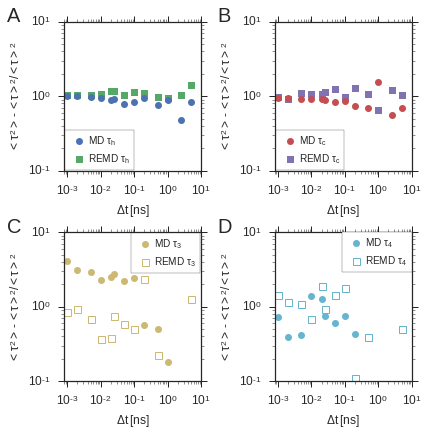

In [97]:
fig, ax = plt.subplots(2,2, figsize=(6,6))

for k, v in remd_dt_hdw_d.items():
    #_exp = second_moment_exponentiality(v.wait_T / v.weight)
    _exp = check_exp(v.weight, v.wait_T)
    lg1_remd, = ax[0,0].plot(int(k)*tf, _exp , "s", c=cl[1])   
    
for k, v in remd_dt_cdw_d.items():
    _exp = check_exp(v.weight, v.wait_T)
    lg2_remd, = ax[0,1].plot(int(k)*tf, _exp , "s", c=cl[3])   
        
for k, v in remd_dt_10w_d.items():
    _temp =v.wait_T / v.weight
    if np.any(_temp.values > 0):
        _exp = check_exp(v.weight, v.wait_T)
        lg3_remd, = ax[1,0].plot(int(k)*tf, _exp , "s", c=cl[4], mew=1.0, mfc="None", mec=cl[4])   
    
for k, v in remd_dt_11dw_d.items():
    _temp =v.wait_T / v.weight
    if np.any(_temp.values > 0):
        _exp = check_exp(v.weight, v.wait_T)
        lg4_remd, = ax[1,1].plot(int(k)*tf, _exp , "s", c=cl[5], mew=1.0, mfc="None", mec=cl[5])     
    
    
for k, v in md_dt_hdw_d.items():
    _exp = second_moment_exponentiality(v.wait_T)
    lg1_md, = ax[0,0].plot(int(k)*tf, _exp, "o", c=cl[0])
    
for k, v in md_dt_cdw_d.items():
    _exp = second_moment_exponentiality(v.wait_T)
    lg2_md, = ax[0,1].plot(int(k)*tf, _exp, "o", c=cl[2])
    
for k, v in md_dt_10dw_d.items():
    _exp = second_moment_exponentiality(v.wait_T)
    lg3_md, = ax[1,0].plot(int(k)*tf, _exp, "o", c=cl[4],  mfc=cl[4], mec=cl[4])

for k, v in md_dt_11dw_d.items():
    _exp = second_moment_exponentiality(v.wait_T)
    lg4_md, = ax[1,1].plot(int(k)*tf, _exp, "o", c=cl[5],  mfc=cl[5], mec=cl[5])
    
ax[0,0].legend([lg1_md, lg1_remd], [r'MD $\mathregular{\tau_h}$',
                                   r'REMD $\mathregular{\tau_h}$'],
               loc=3, handletextpad=-0.1, borderaxespad=0.1,
              frameon=True)
ax[0,1].legend([lg2_md, lg2_remd], [r'MD $\mathregular{\tau_c}$',
                                   r'REMD $\mathregular{\tau_c}$'],
               loc=3,handletextpad=-0.1, borderaxespad=0.1,
              frameon=True)

ax[1,0].legend([lg3_md, lg3_remd], [r'MD $\mathregular{\tau_3}$',
                                   r'REMD $\mathregular{\tau_3}$'],
               loc=1,handletextpad=-0.1, borderaxespad=0.1,
              frameon=True)
ax[1,1].legend([lg4_md, lg4_remd], [r'MD $\mathregular{\tau_4}$',
                                   r'REMD $\mathregular{\tau_4}$'],
               loc=1,handletextpad=-0.1, borderaxespad=0.01,
              frameon=True)
    
for a in ax.flat:
    a.loglog()
    a.set_ylim(10**-1, 10**1)
    a.set_xlim(10**-3.1, 10**1)
    a.set_ylabel(r"$\mathregular{< \tau^2> - <\tau>^2 / <\tau>^2}$",
                fontsize=12)
    a.set_xlabel("$\mathregular{\Delta t \, [ns]}$", fontsize=12)
    a.tick_params(axis='both', which='major', labelsize=12)
    
for i, l in enumerate(fig_l):
    ax.flat[i].text(10**-4.8, 10**1, l, fontsize=20)
    
fig.tight_layout()
fig.savefig("plots/exp_ala_md_remd_2.png", dpi=600)
fig.savefig("plots/exp_ala_md_remd_2.pdf")

In [98]:
def check_exp2(tau_a, w_a):
    _av = np.average( tau_a / w_a, weights=w_a)
    _var = np.sum( (tau_a - _av)**2 / (np.sum(w_a)) )
    return _var/ _av**2

def check_exp3(tau_a, w_a):
    #_av = np.average( tau_a / w_a, weights=w_a)
    _av = np.sum(tau_a) / np.sum(w_a)
    #_var = np.sum( w_a*(tau_a/w_a - _av)**2) / (np.sum(w_a)) 
    _s = np.sum(w_a)
    _var = np.sum(tau_a**2/w_a )/ _s - _av**2
    return _var/ _av**2

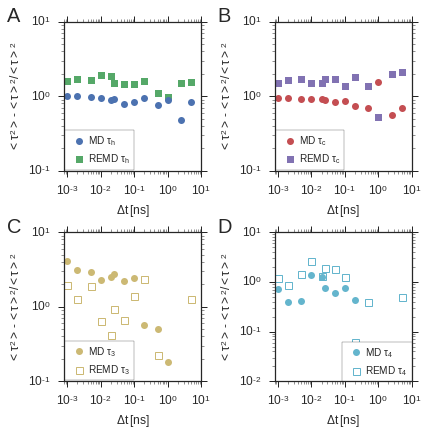

In [99]:
fig, ax = plt.subplots(2,2, figsize=(6,6))

for k, v in remd_dt_hdw_d.items():
    _exp = check_exp3(v.wait_T.astype(float), v.weight.astype(float))
    lg1_remd, = ax[0,0].plot(int(k)*tf, _exp, "s", c=cl[1])
    #ax[0,0].plot([10**-3, 10**1], [1]*2) 
    
#for dt, dt_r in remd_r_dt_d.items():
#    md_r = dt_r[(dt_r.temperature==0) & (dt_r.type==(0,0,0,1))]
#    if np.isfinite(md_r.rate.values):
#        lg_remd = ax[0,0].errorbar(float(dt)*tf,  md_r.rate.values, 
#                  c=cl[1], fmt=".",  label=r"$h \rightarrow c$")

for k, v in remd_dt_cdw_d.items():
    _exp = check_exp3(v.wait_T.astype(float), v.weight.astype(float))
    
    #_av2 = np.average( v.wait_T / v.weight, weights=v.weight)
    #_var5 = np.sum( (v.wait_T - _av2)**2 / (np.sum(v.weight)) )
    lg2_remd, = ax[0,1].plot(int(k)*tf, _exp, "s", c=cl[3])   
    #ax[0,1].plot([10**-3, 10**1], [1]*2) 

for k, v in remd_dt_10w_d.items():
    _temp =v.wait_T / v.weight
    if np.any(_temp.values > 0):
        _exp = check_exp3(v.wait_T, v.weight)
        lg3_remd, = ax[1,0].plot(int(k)*tf, _exp , "s", c=cl[4], mew=1.0, mfc="None", mec=cl[4])   
    
for k, v in remd_dt_11dw_d.items():
    _temp =v.wait_T / v.weight
    if np.any(_temp.values > 0):
        _exp = check_exp3(v.wait_T, v.weight)
        lg4_remd, = ax[1,1].plot(int(k)*tf, _exp, "s", c=cl[5], mew=1.0, mfc="None", mec=cl[5])   
        

for k, v in md_dt_hdw_d.items():
    #_exp = second_moment_exponentiality(v.wait_T)
    _exp = check_exp3(v.wait_T, v.weight)
    lg1_md, = ax[0,0].plot(int(k)*tf, _exp, "o", c=cl[0])
    
for k, v in md_dt_cdw_d.items():
    _exp = check_exp3(v.wait_T, v.weight)
    lg2_md, = ax[0,1].plot(int(k)*tf, _exp, "o", c=cl[2])
    
for k, v in md_dt_10dw_d.items():
    if np.any(v.wait_T >0):
        _exp = check_exp3(v.wait_T, v.weight)
        lg3_md, = ax[1,0].plot(int(k)*tf, _exp, "o", c=cl[4],  mfc=cl[4], mec=cl[4])

for k, v in md_dt_11dw_d.items():
    if np.any(v.wait_T >0):
        _exp = check_exp3(v.wait_T, v.weight)
        lg4_md, = ax[1,1].plot(int(k)*tf, _exp, "o", c=cl[5],  mfc=cl[5], mec=cl[5])
    
ax[0,0].legend([lg1_md, lg1_remd], [r'MD $\mathregular{\tau_h}$',
                                   r'REMD $\mathregular{\tau_h}$'],
               loc=3, handletextpad=-0.1, borderaxespad=0.1,
              frameon=True)
ax[0,1].legend([lg2_md, lg2_remd], [r'MD $\mathregular{\tau_c}$',
                                   r'REMD $\mathregular{\tau_c}$'],
               loc=3,handletextpad=-0.1, borderaxespad=0.1,
              frameon=True)

ax[1,0].legend([lg3_md, lg3_remd], [r'MD $\mathregular{\tau_3}$',
                                   r'REMD $\mathregular{\tau_3}$'],
               loc=3,handletextpad=-0.1, borderaxespad=0.1,
              frameon=True)
ax[1,1].legend([lg4_md, lg4_remd], [r'MD $\mathregular{\tau_4}$',
                                   r'REMD $\mathregular{\tau_4}$'],
               loc=4,handletextpad=-0.1, borderaxespad=0.01,
              frameon=True)


for a in ax.flat:
    a.loglog()
    #a.set_ylim(10**-1, 10**1)
    a.set_xlim(10**-3.1, 10**1)
    a.set_ylabel(r"$\mathregular{< \tau^2> - <\tau>^2 / <\tau>^2}$",
                fontsize=12)
    a.set_xlabel("$\mathregular{\Delta t \, [ns]}$", fontsize=12)
    a.tick_params(axis='both', which='major', labelsize=12)
    
    
for i, l in enumerate(fig_l):
    ax.flat[i].text(10**-4.8, 10**1, l, fontsize=20)

fig.tight_layout()
fig.savefig('av_tau/plots/exp_ala_md_remd_3.png')
fig.savefig('av_tau/plots/exp_ala_md_remd_3.pdf')

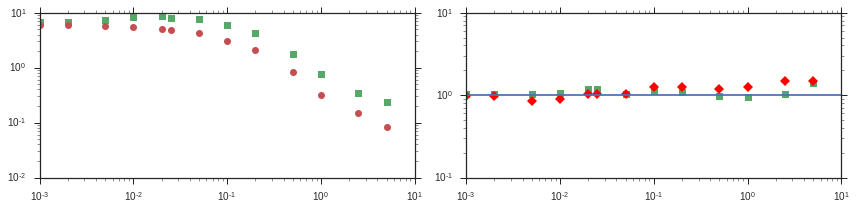

In [100]:
fig, ax = plt.subplots(1,2, figsize=(12,3))

for k, v in remd_dt_hdw_d.items():
    av, var = weights_first_second_moment(v.weight, v.wait_T)
    _av2 = np.average( v.wait_T / v.weight, weights=v.weight)
    _var1  = sum(v.weight/ sum(v.weight)*(v.wait_T / v.weight-_av2)**2)
    _var2 = np.average((v.wait_T / v.weight-_av2)**2, weights=v.weight)
    #_var3 = np.average((v.wait_T / v.weight-_av2)**2)
    _var = np.sum(v.wait_T**2) / np.sum(v.weight)
    _var4 = _var - _av2**2
    
    _var5 = np.sum( (v.wait_T - _av2)**2 / (np.sum(v.weight)) )
    
    #_exp = check_exp(v.weight, v.wait_T)
    lg1_remd, = ax[1].plot(int(k)*tf, var / av**2 , "s", c=cl[1]) 
    lg1_remd, = ax[0].plot(int(k)*tf, 1/av*1000 , "s", c=cl[1])  
    lg1_remd, = ax[0].plot(int(k)*tf, 1/_av2*1000 , "o", c=cl[2]) 
    ax[1].plot(int(k)*tf, _var5/ _av2**2, "D", c='red')
    

ax[1].plot([10**-3, 10**1], [1]*2)    
    
ax[0].loglog()  
#ax[1].semilogx()
ax[1].loglog()
    
fig.tight_layout()

In [101]:
! mkdir -p lifetime_ar/coil
! mkdir -p lifetime_ar/helix
! ls lifetime_ar/


coil   lifetimes_coil.tar.gz   raw_weights_lifetimes
helix  lifetimes_helix.tar.gz


In [102]:
md_lagtime_l

[1, 2, 5, 10, 20, 25, 50, 100, 200, 500, 1000, 2500, 5000]

## save lifetime distributions

In [103]:
for k, v in remd_dt_hdw_d.items():
    #print k
    wa_tau_a_ar = np.column_stack((v.weight.values, v.weight.values / sum(v.weight.values),  v.wait_T.values))
    np.savetxt("lifetime_ar/helix/lifetime_dt{}_ala_h.txt".format(k), wa_tau_a_ar)
    
for k, v in remd_dt_cdw_d.items():
    #print k
    wa_tau_a_ar = np.column_stack((v.weight.values, v.weight.values / sum(v.weight.values), v.wait_T.values))
    np.savetxt("lifetime_ar/coil/lifetime_dt{}_ala_h.txt".format(k), wa_tau_a_ar)

In [104]:
for k, v in md_dt_hdw_d.items():
    ar = np.column_stack((v.weight.values, v.weight.values / sum(v.weight.values),  v.wait_T.values ))
    np.savetxt("lifetime_ar/helix/lifetime_dt{}_ala_h_md.txt".format(k), ar)
    
for k, v in md_dt_cdw_d.items():
    ar = np.column_stack((v.weight.values,v.weight.values / sum(v.weight.values),  v.wait_T.values ))
    np.savetxt("lifetime_ar/coil/lifetime_dt{}_ala_c_md.txt".format(k), ar)

# First moment directly from the lifetimes

TO DO: add errors via counts

In [105]:
remd_r_dt_d['500'].head()

,temperature,type,rate,events,sum_weight,rev_events,rev_sum_weight,sym_weight,std_p,std_m,err_m,err_p
0,0,"(0, 0, 0, 1)",0.819295,119,51.609524,103,45.066667,96.676190,0.907006,0.740066,0.079229,0.087711
1,1,"(0, 0, 0, 1)",0.810426,109,46.422222,107,46.776190,93.198413,0.898876,0.730680,0.079746,0.088450
2,2,"(0, 0, 0, 1)",0.700050,99,41.772222,102,44.333333,86.105556,0.779707,0.628531,0.071519,0.079657
3,3,"(0, 0, 0, 1)",0.662623,109,45.927778,113,46.176190,92.103968,0.735393,0.597054,0.065569,0.072770
4,4,"(0, 0, 0, 1)",0.777334,100,41.892857,114,47.500000,89.392857,0.864056,0.699317,0.078017,0.086721


In [106]:
def _count_err_from_rate_calc(tau, r_df, trans):
    md_r = r_df[(r_df.type.isin(trans))]
    _sum = md_r.rate.sum()
    if _sum > 0:
        _N = md_r.sym_weight.sum()
    return tau*np.exp(1/_N**0.5), tau*np.exp(-1/_N**0.5)  


def _count_err_at_temp(r_df, trans, temp):
    p, m = _count_err_from_rate_calc(r_df[r_df.temperature==temp], trans)
    return m, p

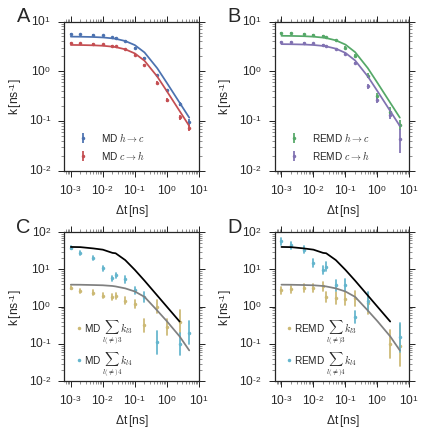

In [107]:
fig, ax = plt.subplots(2,2, figsize=(6,6))

for k, v in remd_dt_hdw_d.items():
    dt_r = remd_r_dt_d[str(k)]
    md_r = dt_r[(dt_r.temperature==0) & (dt_r.type==(0,0,0,1))]
    tau_av = np.average(v.wait_T/ v.weight, weights=v.weight)
    lg1_remd = ax[0,1].errorbar(int(k)*tf,  1.0/tau_av*1000.0, yerr=[md_r.err_m.values ,
                                 md_r.err_p.values ],c=cl[1], fmt=".",
                                 label=r"$h \rightarrow c$")
    
for k, v in remd_dt_cdw_d.items():
    dt_r = remd_r_dt_d[str(k)]
    md_r = dt_r[(dt_r.temperature==0) & (dt_r.type==(0,1,0,0))]
    tau_av = np.average(v.wait_T/ v.weight, weights=v.weight)
    #lg2_remd, = ax[0,1].plot(int(k)*tf, 1.0 / tau_av*1000.0 , "s", c=cl[3])   
    lg2_remd = ax[0,1].errorbar(int(k)*tf,  1.0/tau_av*1000.0, yerr=[md_r.err_m.values ,
                                 md_r.err_p.values ],c=cl[3], fmt=".",
                                 label=r"$c \rightarrow h$")
        
for k, v in remd_dt_10w_d.items():
    dt_r = remd_r_dt_d[str(k)]
    md_r = dt_r[(dt_r.temperature==0) & (dt_r.type.isin(trans_from_10))]
    
    if np.any(v.wait_T > 0) and md_r.rate.sum() > 0 :
        tau_av = np.average(v.wait_T/ v.weight, weights=v.weight)
        
        _m, _p = _count_err_from_rate_calc( 1.0/ tau_av * 1000.0,
                                           md_r, trans_from_10)
        ax[1,1].plot([int(k)*tf]*2, [ _m,  _p], "-", c=cl[4] )
        lg3_remd, = ax[1,1].plot(int(k)*tf, 1.0/ tau_av * 1000.0 , ".", c=cl[4], mec=cl[4]) #  mew=1.0, mfc="None"
    
for k, v in remd_dt_11dw_d.items():
    dt_r = remd_r_dt_d[str(k)]
    md_r = dt_r[(dt_r.temperature==0) & (dt_r.type.isin(trans_from_11))]
    if np.any(v.wait_T.values > 0) and md_r.rate.sum() > 0 :

        tau_av = np.average(v.wait_T/ v.weight, weights=v.weight)
        _m, _p = _count_err_from_rate_calc( 1.0/ tau_av * 1000.0,
                                           md_r, trans_from_11)
        ax[1,1].plot([int(k)*tf]*2, [ _m,  _p], "-", c=cl[5] )
        lg4_remd, = ax[1,1].plot(int(k)*tf, 1.0/ tau_av * 1000.0 , ".", c=cl[5], mec=cl[5]) #  mew=1.0, mfc="None"  
        
# mfpt h
ax[0,1].plot(remd_lagtime_ar*tf, inv_lifetime_two_state_lagtime(
    remd_lagtime_ar*tf, popt_ph[0][0], kex_fit_remd),
          c=cl[3])
# mfpt c
ax[0,1].plot(remd_lagtime_ar*tf, inv_lifetime_two_state_lagtime(
    remd_lagtime_ar*tf, popt_pc[0][0], kex_fit_remd),
          c=cl[1])
    
    
for k, v in md_dt_hdw_d.items():
    dt_r = md_r_dt_d[str(k)]
    md_r = dt_r[(dt_r.temperature==0) & (dt_r.type==(0,0,0,1))]
  
    _temp =v.wait_T / v.weight
    if np.any(_temp.values > 0):
        tau_av, var_tau = weights_first_second_moment(v.weight, v.wait_T)
        #lg1_md, = ax[0,0].plot(int(k)*tf, 1.0/tau_av*1000.0, "o", c=cl[0])
        lg1_md = ax[0,0].errorbar(int(k)*tf,  1.0/tau_av*1000.0, yerr=[md_r.err_m.values ,
                                 md_r.err_p.values ],c=cl[0], fmt=".",
                                 label=r"$h \rightarrow c$")
        
ax[0,0].legend([md_lg, md_lg2], [r"MD $h \rightarrow c$",
                               r"MD $c \rightarrow h$"],
            loc=3)
    
for k, v in md_dt_cdw_d.items():
    dt_r = md_r_dt_d[str(k)]
    md_r = dt_r[(dt_r.temperature==0) & (dt_r.type==(0,1,0,0))]
    _temp =v.wait_T / v.weight
    if np.any(_temp.values > 0):
        tau_av, var_tau = weights_first_second_moment(v.weight, v.wait_T)
        #lg2_md, = ax[0,0].plot(int(k)*tf, 1.0/tau_av*1000.0, "o", c=cl[2])
        lg2_md = ax[0,0].errorbar(int(k)*tf,  1.0/tau_av*1000.0, yerr=[md_r.err_m.values ,
                                 md_r.err_p.values ],c=cl[2], fmt=".",
                                 label=r"$c \rightarrow h$")
        
ax[0,1].legend([lg_remd, lg_remd2], [r"REMD $h \rightarrow c$",
                               r"REMD $c \rightarrow h$"], loc=3)       
    
for k, v in md_dt_10dw_d.items():
    dt_r = md_r_dt_d[str(k)]
    md_r = dt_r[(dt_r.temperature==0) & (dt_r.type.isin(trans_from_10))]
    if np.any(v.wait_T > 0) and md_r.rate.sum() > 0 :
        tau_av = np.average(v.wait_T/ v.weight, weights=v.weight)
        
        _m, _p = _count_err_from_rate_calc( 1.0/ tau_av * 1000.0,
                                           md_r, trans_from_10)
        ax[1,0].plot([int(k)*tf]*2, [ _m,  _p], "-", c=cl[4] )
        #tau_av, var_tau = weights_first_second_moment(v.weight, v.wait_T)  
        lg3_md, = ax[1,0].plot(int(k)*tf, 1.0/tau_av*1000.0, ".", c=cl[4],  mfc=cl[4], mec=cl[4])
        

ax[1,0].legend([lg3, lg4], [r'MD $\sum_{l(\neq)3}k_{l3}$',
                           r'MD $\sum_{l(\neq)4}k_{l4}$'],
               loc=3, handletextpad=-0.5,handleheight=0.5,
              borderaxespad=0.01)

for k, v in md_dt_11dw_d.items():
    
    dt_r = md_r_dt_d[str(k)]
    md_r = dt_r[(dt_r.temperature==0) & (dt_r.type.isin(trans_from_11))]
    
    if np.any(v.wait_T > 0) and md_r.rate.sum() > 0 :
        tau_av = np.average(v.wait_T/ v.weight, weights=v.weight)
        
        _m, _p = _count_err_from_rate_calc( 1.0/ tau_av * 1000.0,
                                           md_r, trans_from_11)
        ax[1,0].plot([int(k)*tf]*2, [ _m,  _p], "-", c=cl[5] )
        #tau_av, var_tau = weights_first_second_moment(v.weight, v.wait_T)
        lg4_md, = ax[1,0].plot(int(k)*tf,  1.0/tau_av*1000.0, ".", c=cl[5],  mfc=cl[5], mec=cl[5])
        

#mfpt h
ax[0,0].plot(md_lagtime_ar*tf, inv_lifetime_two_state_lagtime(
        md_lagtime_ar*tf, popt_ph[0][0], k_ex_fit), "-",
          c=cl[2])
#mfpt c
ax[0,0].plot(md_lagtime_ar*tf, inv_lifetime_two_state_lagtime(
        md_lagtime_ar*tf, popt_pc[0][0], k_ex_fit),
          c=cl[0])       
        
ax[1,1].legend([lg3, lg4], [r'REMD $\sum_{l(\neq)3}k_{l3}$',
                           r'REMD $\sum_{l(\neq)4}k_{l4}$'],
               loc=3, handletextpad=-0.5,handleheight=0.5,
              borderaxespad=0.01)
            
    

for a in ax.flat:
    a.loglog()
    a.set_xlabel("$\mathregular{\Delta t \, [ns]}$", fontsize=12)
    a.set_xlim(10**-3.2, 10**1)
    a.tick_params(axis='both', which='major', labelsize=12)
    
for i, a in enumerate(fig_l[:2]):
    ax.flat[i].text(10**-4.7, 10**1, a, fontsize=20)
    ax.flat[i].set_ylabel(r"$\mathregular{k \, [ns^{-1}]}$", fontsize=12)

    
for i, a in enumerate(fig_l[2:]):
    ax.flat[i+2].text(10**-4.7, 10**2, a, fontsize=20)
    ax.flat[i+2].set_ylabel(r"$\mathregular{k \, [ns^{-1}]}$", fontsize=12)
    
    
ax[1,0].plot(syn_ar[:,0], syn_ar[:,1], c='grey')
ax[1,0].plot(syn_ar[:,0], syn_ar[:,2], c='black')    
ax[1,1].plot(syn_ar[:,0], syn_ar[:,1], c='grey')
ax[1,1].plot(syn_ar[:,0], syn_ar[:,2], c='black')
    
fig.tight_layout()
fig.savefig('av_tau/plots/av_tau.png')
fig.savefig('av_tau/plots/av_tau.pdf')

In [108]:
pwd

u'/home/tb/lustelzl/Projects/kinetics/alanine-dipeptide/compare_remd_md/dt-comparison/comparison'